In [1]:
import pandas as pd

In [2]:
# importing movie data

In [3]:
movie=pd.read_csv(r"C:\Users\SREE NITHYA\Downloads\movie_data\movies.csv")

In [4]:
movie.shape

(9742, 3)

In [5]:
# importing rating data

In [6]:
rating=pd.read_csv(r"C:\Users\SREE NITHYA\Downloads\movie_data\ratings.csv")

In [7]:
rating.shape

(100836, 4)

In [8]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [9]:
import numpy as np

In [10]:
# How many unique "userId" are available in "ratings.csv"?

rating["userId"].nunique()

610

In [11]:
# Which movie has recieved maximum number of user ratings?
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [12]:
#merging movie and rating based on movie id and doing groupby and sorting
merged= pd.merge( movie,rating, on = 'movieId')
merged.groupby('title')['rating'].count().sort_values(ascending=False).reset_index()

,title,rating
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
9714,King Solomon's Mines (1950),1
9715,King Solomon's Mines (1937),1
9716,King Ralph (1991),1
9717,King Kong Lives (1986),1


In [13]:
# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [14]:
tag=pd.read_csv(r"C:\Users\SREE NITHYA\Downloads\movie_data\tags.csv")

In [15]:
mergedmov_tag= pd.merge( movie,tag, on = 'movieId')
mergedmov_tag[mergedmov_tag["title"]== "Matrix, The (1999)"] 

,movieId,title,genres,userId,tag,timestamp
1313,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,martial arts,1457842912
1314,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,sci-fi,1457842899
1315,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474,alternate universe,1137204991
1316,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,philosophy,1424141098
1317,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,post apocalyptic,1424141101


In [16]:
# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"
# Already merged data is used here
termdata=merged[merged["title"]=="Terminator 2: Judgment Day (1991)"]
termdata['rating'].mean()

3.970982142857143

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='rating', ylabel='Density'>

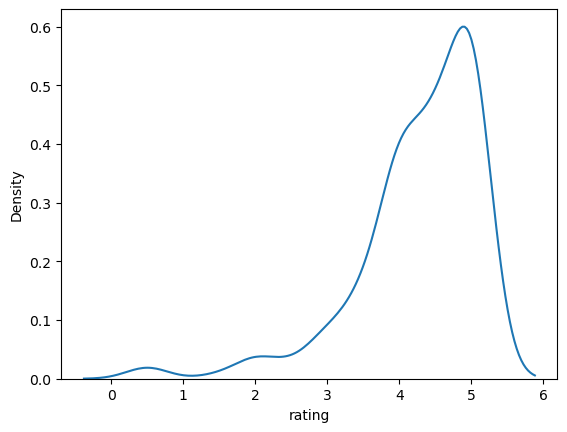

In [18]:
# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?
fightdata=merged[merged["title"]=="Fight Club (1999)"]
plot=fightdata["rating"]
sns.kdeplot(plot)

In [19]:
#Mandatory Operations:
#1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
#2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
#3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

grouped_ratings = rating.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']
merged_df = pd.merge(movie, grouped_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['rating_count'] > 50]
# saving to dataframe
filtered_df=filtered_movies


In [20]:
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [21]:
# Which movie is the most popular based on  average user ratings?
filtered_df.sort_values(by="rating_mean", ascending=False)

,movieId,title,genres,rating_count,rating_mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041
...,...,...,...,...,...
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
376,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,55,2.645455
379,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635


In [22]:
# Select all the correct options which comes under top 5 popular movies based on number of user ratings.
filtered_df.sort_values(by="rating_count", ascending=False).head()

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [23]:
# Which Sci-Fi movie is "third most popular" based on the number of user ratings?
filtered_df[filtered_df['genres'].apply(lambda x: 'Sci-Fi' in x.split('|'))].sort_values(by='rating_count',ascending=False)

,movieId,title,genres,rating_count,rating_mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [24]:
# Importing link data
link=pd.read_csv(r"C:\Users\SREE NITHYA\Downloads\movie_data\links.csv")

In [25]:
link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [28]:
#You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

#Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
movies_with_imdb_ids = pd.merge(filtered_df, link, on='movieId', how='inner')

# Function to scrape IMDB reviews for a movie given its IMDB ID
def scrapper(imdb_id):
    id_str = str(int(imdb_id))
    n_zeroes = 7 - len(id_str)
    new_id = "0" * n_zeroes + id_str
    URL = f"https://www.imdb.com/title/tt{new_id}/reviews"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all review containers
    review_containers = soup.find_all('div', class_='text show-more__control')  # Update this class to the actual review container class
    
    reviews = [container.text.strip() for container in review_containers]
    return reviews

# Iterate through movies with IMDB IDs and scrape reviews
reviews_data = []
for index, row in movies_with_imdb_ids.iterrows():
    imdb_id = row['imdbId']
    movie_reviews = scrapper(imdb_id)
    reviews_data.extend([(imdb_id, review) for review in movie_reviews])

# Create a DataFrame from the collected reviews
reviews_df = pd.DataFrame(reviews_data, columns=['imdbId', 'Review_Text'])

In [30]:
# Saving to csv
reviews_df.to_csv("reviews.csv")

In [31]:
reviews_df

,imdbId,Review_Text
0,114709,Andy's toys live a reasonable life of fun and ...
1,114709,This is a very clever animated story that was ...
2,114709,I am a big fan of the animated movies coming f...
3,114709,Toy Story – 5/5 starsChildren play with toys. ...
4,114709,Toy Story is a sheer delight to view on the sc...
...,...,...
10859,1431045,"First off, I do not read comics so I do not kn..."
10860,1431045,What mythology and stories about Gods were for...
10861,1431045,"With a brilliant script, visceral action, and ..."
10862,1431045,Maybe it's the fact that I never read any of t...


In [32]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [35]:
merged_reviews_links = pd.merge(reviews_df, link, on='imdbId', how='inner')

merged_reviews_links_ratings = pd.merge(merged_reviews_links,filtered_df, on = 'movieId', how = 'inner')

In [48]:
#Mention the movieId of the movie which has the highest IMDB rating.

merged_reviews_links_ratings.sort_values(by='rating_count',ascending=False)

,imdbId,Review_Text,movieId,tmdbId,title,genres,rating_count,rating_mean
1541,109830,Based on the 1986 novel by Winston Groom of th...,356,13.0,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
1529,109830,... seems to be the theme of this film. Forres...,356,13.0,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
1543,109830,When I originally watched this with my mom 20 ...,356,13.0,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
1542,109830,For anyone who grew up in the turbulent Sixtie...,356,13.0,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
1520,109830,"""I've made about 20 films and 5 of them are pr...",356,13.0,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
...,...,...,...,...,...,...,...,...
3834,106308,This is the third and final installment of the...,1215,766.0,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,51,4.039216
3835,106308,Army of Darkness is a action/ adventure film i...,1215,766.0,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,51,4.039216
8043,139654,"Wow! What a superb film, Denzel Washington at ...",4776,2034.0,Training Day (2001),Crime|Drama|Thriller,51,3.794118
8042,139654,This movie was hyped up so much cuz Denzel was...,4776,2034.0,Training Day (2001),Crime|Drama|Thriller,51,3.794118


In [49]:
#Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.
merged_reviews_links_ratings[merged_reviews_links_ratings['genres'].apply(lambda x: 'Sci-Fi' in x.split('|'))].sort_values(by='rating_count',ascending=False)

,imdbId,Review_Text,movieId,tmdbId,title,genres,rating_count,rating_mean
6203,133093,Truly a masterpiece in every way! If it wasn't...,2571,603.0,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
6192,133093,"At first, I wasn't interested in seeing the Ma...",2571,603.0,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
6180,133093,"When this came out, I was living with a roomma...",2571,603.0,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
6181,133093,I have an interesting history and relationship...,2571,603.0,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
6183,133093,"This film doesn't age, it will be contemporary...",2571,603.0,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
...,...,...,...,...,...,...,...,...
9621,376994,EDITED: Why do people keep reporting me for sp...,45499,36668.0,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller,52,3.355769
9620,376994,Greasy Ratner's grimly chaotic end to the orig...,45499,36668.0,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller,52,3.355769
9619,376994,MASSIVE SPOILERS AHEAD -Last night I went to w...,45499,36668.0,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller,52,3.355769
9618,376994,"I am a big fan of X-Men, the comic books, the ...",45499,36668.0,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller,52,3.355769
